# ASSIGNMENT ON CLASSIFICATION

In [53]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
#loading dataset
d=pd.read_excel(r"C:\Users\HP\Downloads\ICT-DS\iris_ML.xls")

In [55]:
d.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [56]:
d.shape

(150, 5)

In [162]:
d.info() #information of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [58]:
#finding no. of not null values
d.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

## PREPROCESSING STEPS

In [59]:
num_cols=d[['SL','SW','PL','PW']]

In [60]:
#handling missing values
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
imputer = imputer.fit(num_cols)
num_cols=imputer.transform(num_cols)

In [61]:
num_cols=pd.DataFrame(num_cols,columns=['SL','SW','PL','PW'])

In [62]:
type(num_cols)

pandas.core.frame.DataFrame

In [63]:
num_cols.isna().sum()

SL    0
SW    0
PL    0
PW    0
dtype: int64

In [64]:
d.drop(d[['SL','SW','PL','PW']],axis=1,inplace=True)

In [65]:
data=pd.concat([num_cols,d],axis=1)

In [66]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,5.8,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [22]:
data.isna().sum()  

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

zero missing values left

In [24]:
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [25]:
print(data['Classification'].value_counts())
print(data['Classification'].value_counts(normalize=True))

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Classification, dtype: int64
Iris-setosa        0.333333
Iris-virginica     0.333333
Iris-versicolor    0.333333
Name: Classification, dtype: float64


In [163]:
#finding outliers on each column

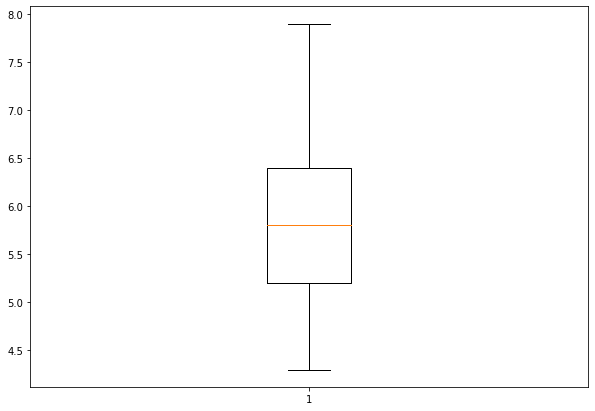

In [67]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data['SL'])
plt.show()

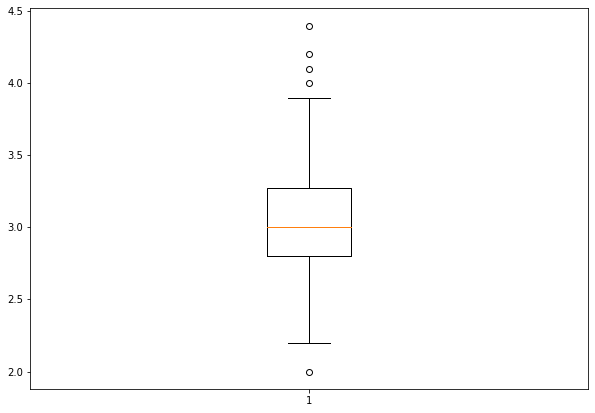

In [68]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data['SW'])
plt.show()

outlier detected

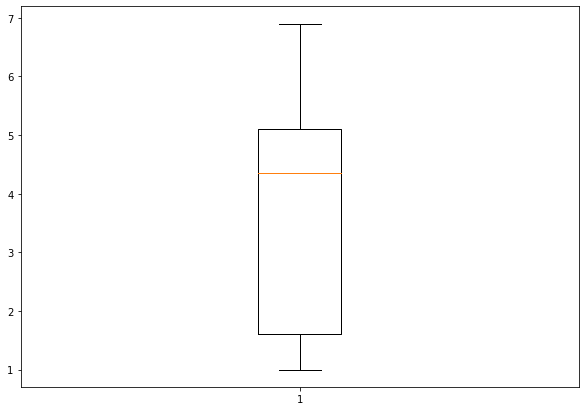

In [69]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data['PL'])
plt.show()

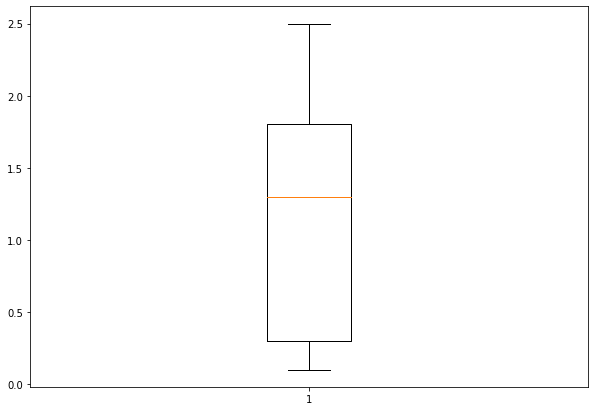

In [70]:
fig = plt.figure(figsize =(10, 7))
plt.boxplot(data['PW'])
plt.show()

In [71]:
Q1=np.percentile(data['SW'],25)
Q3=np.percentile(data['SW'],75)
IQR=Q3-Q1
IQR

0.47499999999999964

In [72]:
ll=Q1-1.5*IQR
up=Q3+1.5*IQR

In [73]:
outliers=[]
for x in data['SW']:
    if ((x>up) or (x<ll)):
        outliers.append(x)
outliers

[4.0, 4.4, 4.1, 4.2, 2.0]

In [74]:
ind=data['SW']>up
data.loc[ind].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [75]:
ind=data['SW']<ll
data.loc[ind].index

Int64Index([60], dtype='int64')

In [76]:
data.drop([14, 15, 32, 33],inplace=True)

In [78]:
data.drop([60],inplace=True)

In [95]:
data.head(60)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
5,5.4,3.9,1.70,0.4,0
6,4.6,3.4,1.40,0.3,0
7,5.0,3.4,1.50,0.2,0
8,4.4,2.9,1.40,0.2,0
9,4.9,3.1,1.50,0.1,0


outliers handled.

In [164]:
#LABEL ENCODING

In [98]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['Classification']=label_encoder.fit_transform(data['Classification'])

In [165]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [166]:
#CORRELATION

In [99]:
data.corr()

,SL,SW,PL,PW,Classification
SL,1.000000,-0.102874,0.843357,0.809185,0.782734
SW,-0.102874,1.000000,-0.362630,-0.294115,-0.368128
PL,0.843357,-0.362630,1.000000,0.933262,0.924480
PW,0.809185,-0.294115,0.933262,1.000000,0.955056
Classification,0.782734,-0.368128,0.924480,0.955056,1.000000


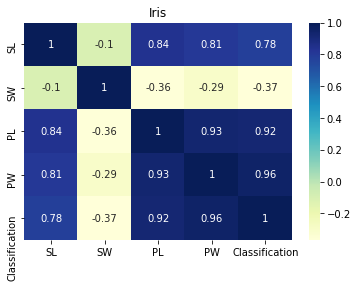

In [100]:
corr_matrix=data.corr()
heat_map = sns.heatmap(corr_matrix,annot = True,cmap='YlGnBu')
plt.title( "Iris" )
plt.show()

In [123]:
y=data['Classification']
x=data.drop('PW',axis=1) #high correlation 

## splitting training and testing data

In [167]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

# CLASSIFICATIONS:

# LOGISTIC REGRESSION

In [141]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model=log_model.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [131]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [135]:
y_pred=log_model.predict(x_test)

In [137]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# KNN

In [134]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [135]:
y_pred=log_model.predict(x_test)

In [136]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [131]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [137]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [148]:
print('accuracy is : ',accuracy_score(y_test,y_pred))

accuracy is :  1.0


In [143]:
metric_k=[]
neighbours=np.arange(3,15)
for k in neighbours:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(x_train,y_train)
    y_pred_knn=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

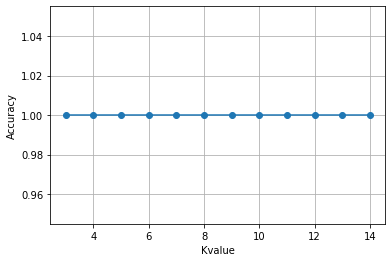

In [144]:
plt.plot(neighbours,metric_k,'o-')
plt.xlabel('Kvalue')
plt.ylabel('Accuracy')
plt.grid()

In [145]:
confusion_matrix(y_test,y_pred_knn)

array([[ 9,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# SVM

In [146]:
from sklearn.svm import SVC
svm_cls=SVC(kernel='linear')
svm_cls.fit(x_train,y_train)
y_pred_svm=svm_cls.predict(x_test)

In [149]:
accuracy_score(y_test,y_pred_svm)

1.0

In [156]:
confusion_matrix(y_test,y_pred_svm)

array([[ 9,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# DECISION TREE

In [153]:
from sklearn.tree import DecisionTreeClassifier
dt_cls=DecisionTreeClassifier()
dt_cls=dt_cls.fit(x_train,y_train)
y_pred_dt=dt_cls.predict(x_test)

In [155]:
accuracy_score(y_test,y_pred_dt)

1.0

In [157]:
confusion_matrix(y_test,y_pred_dt)

array([[ 9,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# RANDOM FOREST

In [158]:
from sklearn.ensemble import RandomForestClassifier
rf_cls=RandomForestClassifier()
rf_cls=rf_cls.fit(x_train,y_train)
y_pred_rf=rf_cls.predict(x_test)

In [159]:
accuracy_score(y_test,y_pred_rf)

1.0

In [160]:
confusion_matrix(y_test,y_pred_rf)

array([[ 9,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)